YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


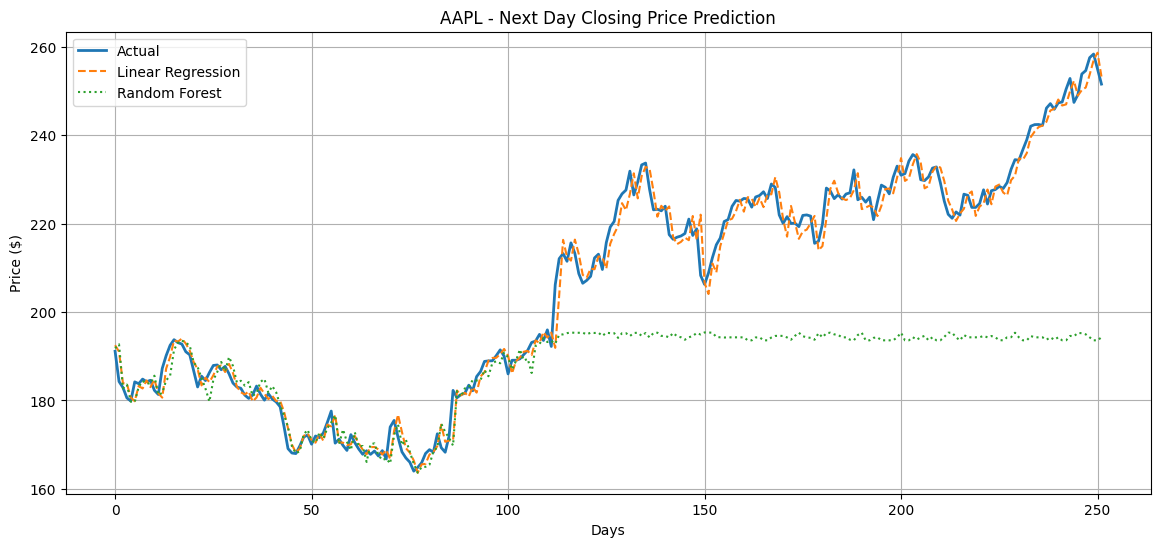

Linear Regression RMSE: 3.11
Random Forest RMSE: 25.72


In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Load Data
ticker = 'AAPL'  # You can change to 'TSLA', 'GOOGL', etc.
df = yf.download(ticker, start="2020-01-01", end="2024-12-31")

# Step 2: Prepare Features
df['Next_Close'] = df['Close'].shift(-1)  # Predict next day's close
df.dropna(inplace=True)

features = ['Open', 'High', 'Low', 'Volume']
X = df[features]
y = df['Next_Close']

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Step 4a: Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Step 4b: Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Step 5: Plot Predictions
plt.figure(figsize=(14, 6))
plt.plot(y_test.values, label='Actual', linewidth=2)
plt.plot(lr_preds, label='Linear Regression', linestyle='--')
plt.plot(rf_preds, label='Random Forest', linestyle=':')
plt.title(f"{ticker} - Next Day Closing Price Prediction")
plt.xlabel("Days")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Error Metrics
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))

print(f"Linear Regression RMSE: {lr_rmse:.2f}")
print(f"Random Forest RMSE: {rf_rmse:.2f}")
